## Tarea 2:

Integrantes:

Sebastian Neely   
Eugenio Paz  
Vittorio Pesenti  
Nicolas Nieto  
Adolfo Godoy  
Nicolas Emeterio Guzman  
Cristobal Varas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [2]:
casos= pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [3]:
casosrm = casos[casos["Region"] == "Metropolitana"]
casosrm.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-01,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,Tasa
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,813.0,815.0,820.0,823.0,822.0,825.0,826.0,827.0,827.0,11168.1
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11339.0,11397.0,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,10749.6
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2628.0,2653.0,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,9861.5
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8854.0,8884.0,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,10348.9
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,18961.0,19056.0,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,13762.0


In [4]:
casosrm.drop("Tasa", axis=1, inplace= True)

/Users/sjneelyf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
casospivote = casosrm.melt(id_vars=["Region","Codigo region","Comuna",
                                   "Codigo comuna","Poblacion"], var_name="fecha", value_name="casos") 

In [6]:
#casospivote.drop('Region', axis=1, inplace=True)
casospivote.drop('Codigo region', axis=1, inplace=True)
casospivote.drop('Codigo comuna', axis=1, inplace=True)
casospivote.drop('Poblacion', axis=1, inplace=True)

In [7]:
casospivote['fecha'] = pd.to_datetime(casospivote['fecha'])

In [8]:
casos_s = casospivote.groupby('Comuna').resample('W-Mon', on='fecha').sum().reset_index().sort_values(by='fecha')
casos_s

,Comuna,fecha,casos
0,Alhue,2020-03-30,0.0
2904,Penaflor,2020-03-30,10.0
1760,Lampa,2020-03-30,10.0
4400,Talagante,2020-03-30,0.0
4576,Vitacura,2020-03-30,83.0
...,...,...,...
3607,Quinta Normal,2021-11-29,36072.0
967,El Monte,2021-11-29,8706.0
3695,Recoleta,2021-11-29,40912.0
3079,Penalolen,2021-11-29,69039.0


In [10]:
casos_las_condes = casos_s[casos_s['Comuna']=="Las Condes"]
casos_las_condes

,Comuna,fecha,casos
1848,Las Condes,2020-03-30,181.0
1849,Las Condes,2020-04-06,690.0
1850,Las Condes,2020-04-13,843.0
1851,Las Condes,2020-04-20,952.0
1852,Las Condes,2020-04-27,701.0
...,...,...,...
1931,Las Condes,2021-11-01,42342.0
1932,Las Condes,2021-11-08,42983.0
1933,Las Condes,2021-11-15,43601.0
1934,Las Condes,2021-11-22,43995.0


In [11]:
casos_las_condes["RestaCasos"] = casos_las_condes["casos"]-casos_las_condes["casos"].shift()


<ipython-input-11-dfefa8c253dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_las_condes["RestaCasos"] = casos_las_condes["casos"]-casos_las_condes["casos"].shift()


In [12]:
casos_las_condes

,Comuna,fecha,casos,RestaCasos
1848,Las Condes,2020-03-30,181.0,NaN
1849,Las Condes,2020-04-06,690.0,509.0
1850,Las Condes,2020-04-13,843.0,153.0
1851,Las Condes,2020-04-20,952.0,109.0
1852,Las Condes,2020-04-27,701.0,-251.0
...,...,...,...,...
1931,Las Condes,2021-11-01,42342.0,793.0
1932,Las Condes,2021-11-08,42983.0,641.0
1933,Las Condes,2021-11-15,43601.0,618.0
1934,Las Condes,2021-11-22,43995.0,394.0


In [13]:
casoslimpios=casos_las_condes[casos_las_condes["RestaCasos"]>0].reset_index()
casoslimpios.drop('index', axis=1, inplace=True)
casoslimpios.drop('casos', axis=1, inplace=True)

casoslimpios


,Comuna,fecha,RestaCasos
0,Las Condes,2020-04-06,509.0
1,Las Condes,2020-04-13,153.0
2,Las Condes,2020-04-20,109.0
3,Las Condes,2020-05-04,185.0
4,Las Condes,2020-05-11,478.0
...,...,...,...
80,Las Condes,2021-11-01,793.0
81,Las Condes,2021-11-08,641.0
82,Las Condes,2021-11-15,618.0
83,Las Condes,2021-11-22,394.0


<AxesSubplot:xlabel='fecha', ylabel='RestaCasos'>

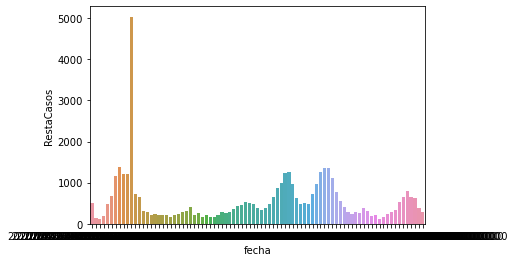

In [14]:
sns.barplot(x="fecha", y="RestaCasos", data=casoslimpios)

<AxesSubplot:xlabel='fecha', ylabel='RestaCasos'>

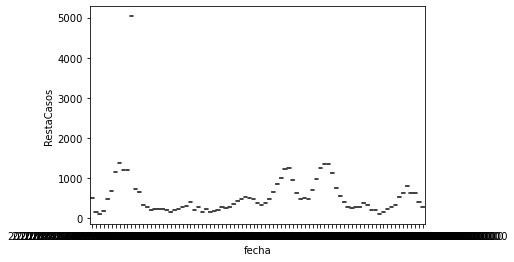

In [15]:
sns.boxplot(x="fecha", y="RestaCasos", data=casoslimpios)

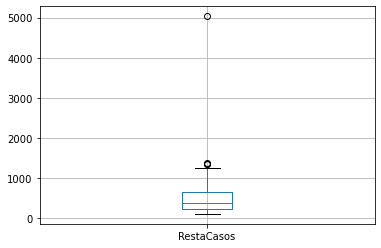

In [25]:
boxplot = casoslimpios.boxplot(column=['RestaCasos'])

In [16]:
casoslimpios_outliers=casos_las_condes[casos_las_condes["RestaCasos"]>1300]
casoslimpios_outliers

,Comuna,fecha,casos,RestaCasos
1857,Las Condes,2020-06-01,4577.0,1373.0
1861,Las Condes,2020-06-29,9225.0,5033.0
1910,Las Condes,2021-06-07,32837.0,1345.0
1911,Las Condes,2021-06-14,34189.0,1352.0


Según la tabla anterior, podemos identificar rápidamente el outlier sobre los 5.000 que corresponde a la semana del 29 de Junio de 2020.

In [18]:
casoslimpios["RestaCasos"].describe()

count      85.000000
mean      554.741176
std       599.618175
min       109.000000
25%       242.000000
50%       386.000000
75%       647.000000
max      5033.000000
Name: RestaCasos, dtype: float64